In [13]:
#To insure that the same random result happens
import random
import math
from math import sqrt

random.seed(63428974)


#For the distance formula
def dformula(px,py):
    return sqrt((px[0]-py[0])**2+(px[1]-py[1])**2)


#For getting the mean of a set of points
def get_mean(points):
    number_of_points = len(points)
    
    sum_of_points = [0,0]
    for point in points:
        sum_of_points[0] += point[0]
        sum_of_points[1] += point[1]
        
    sum_of_points[0] = sum_of_points[0]/number_of_points
    sum_of_points[1] = sum_of_points[1]/number_of_points
    
    return sum_of_points


#For finding out how many times the centroid shifted
def associate(centers, points, associated):
    number_of_changes = 0
    for ip, point in enumerate(points):
        closest = None
        minimum_distance = 1000000000
        for ic, center in enumerate(centers):
            distance = distance(point, center)
            if distance < minimum_distance:
                minimum_distance = dist
                closest = ic
                if closest is None: print("The code doesn't work")
                    
                if associated[ip] != closest:
                    associated[ip] = closest
                    
                    number_of_changes += 1
            return float(nchanged)/len(points)
        
        
#For getting the centroids 
def get_centroids(points, associated, kcls):
    center_points = [[] for _ in range(kcls)]
    for ip, point in enumerate(points):
        center_points[associated[ip]].append(point)
    centroids = []
    for icls in range(kcls):
        mean = get_mean(center_points[icls])
        centroids.append(mean)
    return centroids


#For putting everything together in the actual k-means function
def kmeans(points, kcls, max_iterations = 2000, minimum_shift_fraction = 0.01):
    
    #To make sure the number of points doesn't go over the kcl
    number_of_points = len(points)
    if number_of_points <= kcls**2:
        kcls = int(sqrt(number_of_points))
    
    #To 
    centers = random.sample(points, kcls)
    associated = [0 for _ in points]
    for iter in range(max_iterations):
        changed_fraction = associate(centers, points, associated)
        if changed_fraction <= minimum_shift_fraction:
            print("changed_fraction({}) reached to minimum_shift_fraction({})".format(changed_fraction, minimum_shift_fraction))
            break
        if iter == max_iterations-1:
            print("max_iterations({}) reached.".format(iter))
    return associated

In [ ]:
#After this is just the sample data from your file

In [14]:
def generate_sample(ref_point, std, n):
    points = []
    for _ in range(n):
        p = [random.gauss(ref_point[0], std[0]), random.gauss(ref_point[1], std[1])]
        points.append(p)
    return points

p1 = [1,2]
p2 = [5,3]
p3 = [2,6]
data1 = generate_sample(p1, [0.8, 0.7], 30)
data2 = generate_sample(p2, [1.3, 1.5], 40)
data3 = generate_sample(p3, [1.0, 1.1], 30)
data = []
data = data + data1 + data2 + data3


In [15]:
import matplotlib.pyplot as plt

plt.scatter([x[0] for x in data1], [x[1] for x in data1], marker="*")
plt.scatter([x[0] for x in data2], [x[1] for x in data2], marker="o")
plt.scatter([x[0] for x in data3], [x[1] for x in data3], marker="^")


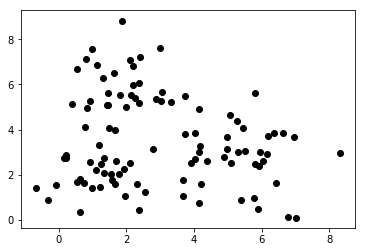

In [16]:
plt.scatter([x[0] for x in data], [x[1] for x in data], c="black", marker="o")

In [18]:
kcls = 3
associated = kmeans(data, kcls, max_iterations=500, minimum_shift_fraction=0.01)
centroids = get_centroids(data, associated, kcls)

NameError: name 'distance' is not defined

In [19]:
associated_colors = []
for a in associated:
    c = "black"
    if a == 0: c = "red"
    elif a == 1: c = "green"
    elif a == 2: c = "blue"
    associated_colors.append(c)
plt.scatter([x[0] for x in data], [x[1] for x in data], c=associated_colors, marker="o")
plt.scatter(centroids[0][0], centroids[0][1], s=250, c="red", marker="*")
plt.scatter(centroids[1][0], centroids[1][1], s=250, c="green", marker="*")
plt.scatter(centroids[2][0], centroids[2][1], s=250, c="blue", marker="*")


NameError: name 'associated' is not defined